In [ ]:
################################ RF with SMOTE-ENN ################################

In [ ]:
#### Uploading the dataset and make some changes ####

In [1]:
# Start with importing the Taiwanese bank dataset.
import pandas as pd

df = pd.read_csv('C:/Users/basvd/OneDrive/Documenten/Tilburg University/Master Data Science & Society/Thesis/Data sets/Taiwan 2005 default credit card data set.csv')



In [2]:
# Show how to dataset looks like.
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [3]:
#Drop the ID column, since it has no value to the models that need to be made.
df = df.drop(df.columns[0], axis=1)
print(df.head())

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0     

In [4]:
# See if there is any row with NA values in there.
## Below shows that there is no row with an NA value, meaning that we do not have to drop any row or fill it with, for example, the average.
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
# Normalize (just like in the last paper) the non-categorical independent variables.
from sklearn.preprocessing import MinMaxScaler

# Specify the columns you want to normalize
columns_to_normalize = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                        'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 
                        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AGE']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the specified columns and transform them
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the normalized DataFrame
print(df)

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  PAY_3  \
0       0.010101    2          2         1  0.051724      2      2     -1   
1       0.111111    2          2         2  0.086207     -1      2      0   
2       0.080808    2          2         2  0.224138      0      0      0   
3       0.040404    2          2         1  0.275862      0      0      0   
4       0.040404    1          2         1  0.620690     -1      0     -1   
...          ...  ...        ...       ...       ...    ...    ...    ...   
29995   0.212121    1          3         1  0.310345      0      0      0   
29996   0.141414    1          3         2  0.379310     -1     -1     -1   
29997   0.020202    1          2         2  0.275862      4      3      2   
29998   0.070707    1          3         1  0.344828      1     -1      0   
29999   0.040404    1          2         1  0.431034      0      0      0   

       PAY_4  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AM

In [6]:
# Print the minimum and maximum values of the columns to check if they are indeed normalised.
print("Minimum values:")
print(df.min())

print("\nMaximum values:")
print(df.max())

Minimum values:
LIMIT_BAL                     0.0
SEX                           1.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                        -2.0
PAY_2                        -2.0
PAY_3                        -2.0
PAY_4                        -2.0
PAY_5                        -2.0
PAY_6                        -2.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default.payment.next.month    0.0
dtype: float64

Maximum values:
LIMIT_BAL                     1.0
SEX                           2.0
EDUCATION                     6.0
MARRIAGE                      3.0


In [7]:
# First we will see how the classes are divided.
from collections import Counter

# First we will see how the classes are divided.
input_cols = df.drop(columns='default.payment.next.month')
target_col = df['default.payment.next.month']
print('Original dataset shape %s' % Counter(target_col))

Original dataset shape Counter({0: 23364, 1: 6636})


In [8]:
# Now we will implement SMOTE-ENN to get the classes balanced again.
from imblearn.combine import SMOTEENN
from collections import Counter

# Apply SMOTE-ENN
smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)
input_cols_res_ENN, target_col_res_ENN = smote_enn.fit_resample(input_cols, target_col)
print('Resampled dataset shape %s' % Counter(target_col_res_ENN))

c:\Users\basvd\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\basvd\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Resampled dataset shape Counter({1: 15422, 0: 12129})


In [ ]:
#### Nested K-fold cross-validation ####

In [9]:
# SMOTE-ENN plus automatic nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

# configure the cross-validation procedure
cv_inner_ENN = KFold(n_splits=3, shuffle=True, random_state=42)
# define the model
model = RandomForestClassifier(random_state=42)
# define search space
space = dict()
space['n_estimators'] = [40, 50, 60]
space['max_features'] = [None, 5, 10]
# define search
search_ENN = GridSearchCV(model, space, scoring='f1', n_jobs=1, cv=cv_inner_ENN, refit=True)
# configure the cross-validation procedure
cv_outer_ENN = KFold(n_splits=10, shuffle=True, random_state=1)

# Execute the nested cross-validation
predicted_labels_ENN = cross_val_predict(search_ENN, input_cols_res_ENN, target_col_res_ENN, cv=cv_outer_ENN, n_jobs=-1)

# Generate the classification report
report_ENN = classification_report(target_col_res_ENN, predicted_labels_ENN, digits=4)
print(report_ENN)

from sklearn.metrics import f1_score
# Calculate F1 score separately with more digits after the comma
f1 = f1_score(target_col_res_ENN, predicted_labels_ENN)
print("F1 Score:", "{:.4f}".format(f1))

              precision    recall  f1-score   support

           0     0.9023    0.9415    0.9215     12129
           1     0.9523    0.9199    0.9358     15422

    accuracy                         0.9294     27551
   macro avg     0.9273    0.9307    0.9286     27551
weighted avg     0.9303    0.9294    0.9295     27551

F1 Score: 0.9358


In [72]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Calculate recall, accuracy, and precision on the test set
recall = recall_score(target_col_res_ENN, predicted_labels_ENN)
print("Recall:", "{:.4f}".format(recall))

accuracy = accuracy_score(target_col_res_ENN, predicted_labels_ENN)
print("Accuracy:", "{:.4f}".format(accuracy))

precision = precision_score(target_col_res_ENN, predicted_labels_ENN)
print("Precision:", "{:.4f}".format(precision))

Recall: 0.9199
Accuracy: 0.9294
Precision: 0.9523


In [73]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(target_col_res_ENN, predicted_labels_ENN)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[11419   710]
 [ 1236 14186]]


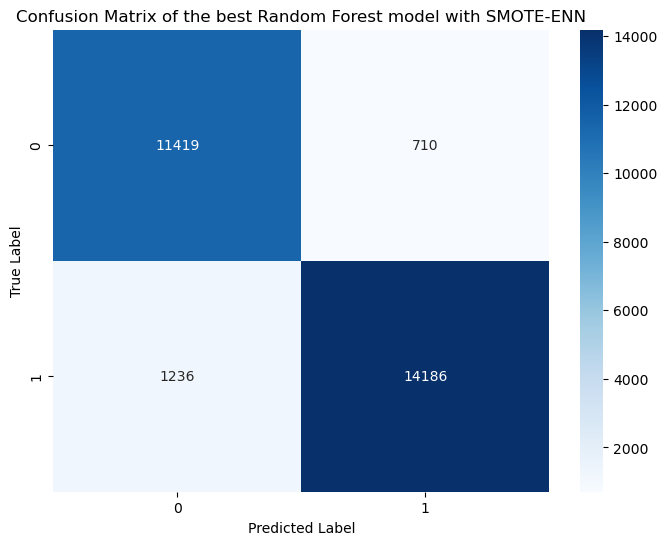

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define plot_confusion_matrix function
def plot_confusion_matrix(cm, set_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix of the best Random Forest model with SMOTE-ENN")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Calculate confusion matrix
conf_matrix = confusion_matrix(target_col_res_ENN, predicted_labels_ENN)

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, "Test")

Best Hyperparameters: {'max_features': None, 'n_estimators': 60}


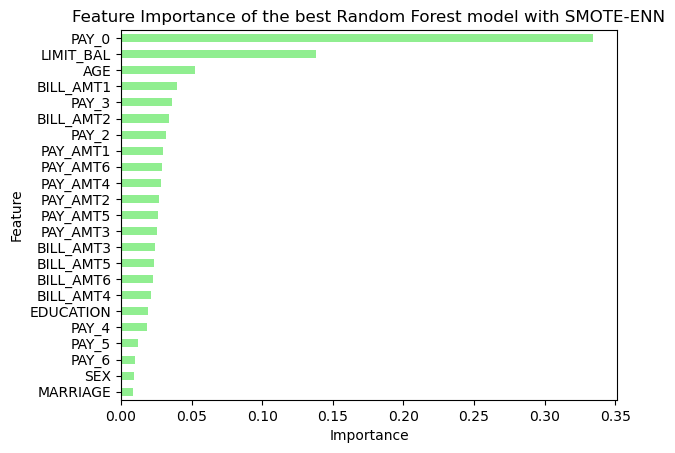

In [77]:
# Best hyperparameters and feature importance
import matplotlib.pyplot as plt
import pandas as pd
search_ENN.fit(input_cols_res_ENN, target_col_res_ENN)

# Access the best hyperparameters
best_params = search_ENN.best_params_
print("Best Hyperparameters:", best_params)

importances = pd.Series(data=search_ENN.best_estimator_.feature_importances_, index=input_cols_res_ENN.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Feature Importance of the best Random Forest model with SMOTE-ENN')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
#### Normal Random Forest ####

In [14]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train_ENN, X_test_ENN, y_train_ENN, y_test_ENN = train_test_split(input_cols_res_ENN, target_col_res_ENN, random_state=42, test_size=0.2)

# Further splitting the training set into training and validation sets
X_train_ENN, X_valid_ENN, y_train_ENN, y_valid_ENN = train_test_split(X_train_ENN, y_train_ENN, random_state=42, test_size=0.25)

print(X_train_ENN.shape)
print(X_test_ENN.shape)
print(X_valid_ENN.shape)
print(y_valid_ENN.shape)
print(y_train_ENN.shape)
print(y_test_ENN.shape)

(16530, 23)
(5511, 23)
(5510, 23)
(5510,)
(16530,)
(5511,)


In [48]:
# First RF model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score
rf_ENN = RandomForestClassifier(random_state=0).fit(X_train_ENN, y_train_ENN)
y_pred_ENN = rf_ENN.predict(X_valid_ENN)

# Calculate the F1 score
rf_f1_ENN = f1_score(y_valid_ENN, y_pred_ENN)
print("F1 Score:", "{:.4f}".format(rf_f1_ENN))

rf_acc_ENN = accuracy_score(y_valid_ENN, y_pred_ENN)
print(classification_report(y_valid_ENN, y_pred_ENN))

F1 Score: 0.9210
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2399
           1       0.94      0.90      0.92      3111

    accuracy                           0.91      5510
   macro avg       0.91      0.91      0.91      5510
weighted avg       0.91      0.91      0.91      5510



Text(0.5, 1.0, 'Features Importances')

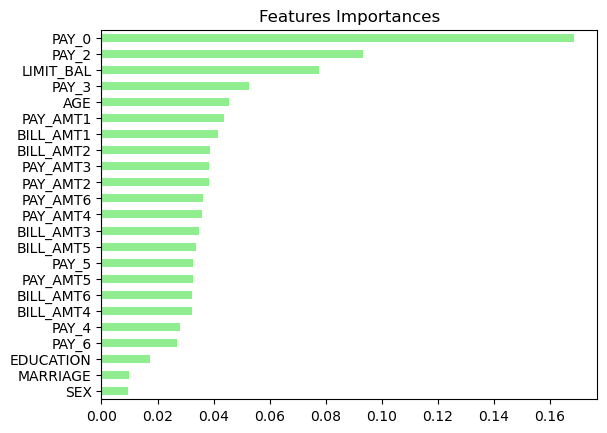

In [16]:
#Feature importance
import matplotlib.pyplot as plt
importances = pd.Series(data=rf_ENN.feature_importances_, index=X_train_ENN.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')

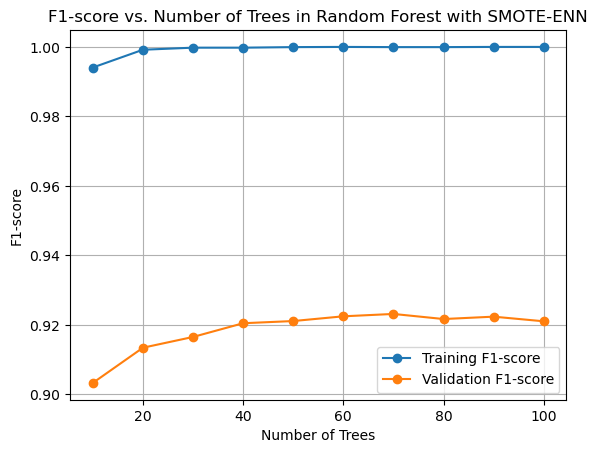

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Define a range of values for the number of trees
num_trees_range_ENN = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Initialize lists to store F1-scores for training and validation sets
train_f1_scores_ENN = []
valid_f1_scores_ENN = []

# Train RandomForestClassifier models with different numbers of trees
for num_trees in num_trees_range_ENN:
    # Create and train the model
    rf_ENN = RandomForestClassifier(n_estimators=num_trees, random_state=0)
    rf_ENN.fit(X_train_ENN, y_train_ENN)
    
    # Predict on training and validation sets
    y_train_pred_ENN = rf_ENN.predict(X_train_ENN)
    y_valid_pred_ENN = rf_ENN.predict(X_valid_ENN)
    
    # Calculate F1-scores for training and validation sets
    train_f1_ENN = f1_score(y_train_ENN, y_train_pred_ENN)
    valid_f1_ENN = f1_score(y_valid_ENN, y_valid_pred_ENN)
    
    # Append F1-scores to the lists
    train_f1_scores_ENN.append(train_f1_ENN)
    valid_f1_scores_ENN.append(valid_f1_ENN)

# Plot the F1-scores for training and validation sets against the number of trees
plt.plot(num_trees_range_ENN, train_f1_scores_ENN, label='Training F1-score', marker='o')
plt.plot(num_trees_range_ENN, valid_f1_scores_ENN, label='Validation F1-score', marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('F1-score')
plt.title('F1-score vs. Number of Trees in Random Forest with SMOTE-ENN')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
# Predict labels on the test set
y_pred_test_ENN = rf_ENN.predict(X_test_ENN)

# Calculate the F1 score on the test set
rf_f1_test_ENN = f1_score(y_test_ENN, y_pred_test_ENN)
print("F1 Score on Test Set:", "{:.4f}".format(rf_f1_test_ENN))

print("Classification Report on Test Set:")
print(classification_report(y_test_ENN, y_pred_test_ENN))

F1 Score on Test Set: 0.9161
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2436
           1       0.94      0.90      0.92      3075

    accuracy                           0.91      5511
   macro avg       0.91      0.91      0.91      5511
weighted avg       0.91      0.91      0.91      5511



In [ ]:
#### Bagging ####

In [50]:
# Normal RF with bagging (10 bags) for SMOTE-ENN
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the RandomForestClassifier with 60 trees
base_classifier = RandomForestClassifier(n_estimators=60, max_features=None, random_state=0)


# Create a BaggingClassifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=0)

# Train the BaggingClassifier
bagging_classifier.fit(X_train_ENN, y_train_ENN)

# Predict using the BaggingClassifier
y_pred_ENN = bagging_classifier.predict(X_valid_ENN)

# Calculate the f1-score and print classification report
bagging_f1_ENN = f1_score(y_valid_ENN, y_pred_ENN)
print("F1 Score:", "{:.4f}".format(bagging_f1_ENN))
print("Classification Report:")
print(classification_report(y_valid_ENN, y_pred_ENN))

F1 Score: 0.9150
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2399
           1       0.94      0.89      0.92      3111

    accuracy                           0.91      5510
   macro avg       0.90      0.91      0.91      5510
weighted avg       0.91      0.91      0.91      5510



In [51]:
# Predict using the BaggingClassifier on the test set
y_pred_ENN_10_test = bagging_classifier.predict(X_test_ENN)

# Calculate the F1-score and print classification report for the test set
bagging_f1_ENN_10_test = f1_score(y_test_ENN, y_pred_ENN_10_test)
print("F1 Score:", "{:.4f}".format(bagging_f1_ENN_10_test))

print("Classification Report for Test Set:")
print(classification_report(y_test_ENN, y_pred_ENN_10_test))

F1 Score: 0.9135
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2436
           1       0.94      0.89      0.91      3075

    accuracy                           0.91      5511
   macro avg       0.90      0.91      0.91      5511
weighted avg       0.91      0.91      0.91      5511



In [52]:
# Normal RF with bagging (25 bags) for SMOTE-ENN
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the RandomForestClassifier with 60 trees
base_classifier = RandomForestClassifier(n_estimators=60, max_features=None, random_state=0)

# Create a BaggingClassifier
bagging_classifier_25 = BaggingClassifier(base_classifier, n_estimators=25, random_state=0)

# Train the BaggingClassifier
bagging_classifier_25.fit(X_train_ENN, y_train_ENN)

# Predict using the BaggingClassifier
y_pred_ENN_25 = bagging_classifier_25.predict(X_valid_ENN)

# Calculate the F1-score and print classification report
bagging_f1_ENN_25 = f1_score(y_valid_ENN, y_pred_ENN_25)
print("F1 Score:", "{:.4f}".format(bagging_f1_ENN_25))

print("Classification Report:")
print(classification_report(y_valid_ENN, y_pred_ENN_25))

F1 Score: 0.9138
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2399
           1       0.94      0.89      0.91      3111

    accuracy                           0.91      5510
   macro avg       0.90      0.91      0.90      5510
weighted avg       0.91      0.91      0.91      5510



In [53]:
# Predict using the BaggingClassifier on the test set
y_pred_ENN_25_test = bagging_classifier_25.predict(X_test_ENN)

# Calculate the F1-score and print classification report for the test set
bagging_f1_ENN_25_test = f1_score(y_test_ENN, y_pred_ENN_25_test)
print("F1 Score:", "{:.4f}".format(bagging_f1_ENN_25_test))

print("Classification Report for Test Set:")
print(classification_report(y_test_ENN, y_pred_ENN_25_test))

F1 Score: 0.9123
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2436
           1       0.94      0.89      0.91      3075

    accuracy                           0.90      5511
   macro avg       0.90      0.91      0.90      5511
weighted avg       0.91      0.90      0.91      5511



In [54]:
# Normal RF with bagging (60 bags) for SMOTE-ENN
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the RandomForestClassifier with 60 trees
base_classifier = RandomForestClassifier(n_estimators=60, max_features=None, random_state=0)

# Create a BaggingClassifier
bagging_classifier_60 = BaggingClassifier(base_classifier, n_estimators=60, random_state=0)

# Train the BaggingClassifier
bagging_classifier_60.fit(X_train_ENN, y_train_ENN)

# Predict using the BaggingClassifier
y_pred_ENN_60 = bagging_classifier_60.predict(X_valid_ENN)

# Calculate the F1-score and print classification report
bagging_f1_ENN_60 = f1_score(y_valid_ENN, y_pred_ENN_60)
print("F1 Score:", "{:.4f}".format(bagging_f1_ENN_60))

print("Classification Report:")
print(classification_report(y_valid_ENN, y_pred_ENN_60))

F1 Score: 0.9154
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2399
           1       0.94      0.89      0.92      3111

    accuracy                           0.91      5510
   macro avg       0.90      0.91      0.91      5510
weighted avg       0.91      0.91      0.91      5510



In [55]:
# Predict using the BaggingClassifier on the test set
y_pred_ENN_60_test = bagging_classifier_60.predict(X_test_ENN)

# Calculate the F1-score and print classification report for the test set
bagging_f1_ENN_60_test = f1_score(y_test_ENN, y_pred_ENN_60_test)
print("F1 Score:", "{:.4f}".format(bagging_f1_ENN_60_test))

print("Classification Report for Test Set:")
print(classification_report(y_test_ENN, y_pred_ENN_60_test))

F1 Score: 0.9153
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2436
           1       0.94      0.89      0.92      3075

    accuracy                           0.91      5511
   macro avg       0.91      0.91      0.91      5511
weighted avg       0.91      0.91      0.91      5511



In [59]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Calculate recall, accuracy, and precision on the test set
recall_ENN_60_test = recall_score(y_test_ENN, y_pred_ENN_60_test)
print("Recall:", "{:.4f}".format(recall_ENN_60_test))

accuracy_ENN_60_test = accuracy_score(y_test_ENN, y_pred_ENN_60_test)
print("Accuracy:", "{:.4f}".format(accuracy_ENN_60_test))

precision_ENN_60_test = precision_score(y_test_ENN, y_pred_ENN_60_test)
print("Precision:", "{:.4f}".format(precision_ENN_60_test))


Recall: 0.8911
Accuracy: 0.9080
Precision: 0.9409


In [57]:
# Normal RF with bagging (120 bags) for SMOTE-ENN
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the RandomForestClassifier with 60 trees
base_classifier = RandomForestClassifier(n_estimators=60, max_features=None, random_state=0)

# Create a BaggingClassifier
bagging_classifier_120 = BaggingClassifier(base_classifier, n_estimators=120, random_state=0)

# Train the BaggingClassifier
bagging_classifier_120.fit(X_train_ENN, y_train_ENN)

# Predict using the BaggingClassifier
y_pred_ENN_120 = bagging_classifier_120.predict(X_valid_ENN)

# Calculate the F1-score and print classification report
bagging_f1_ENN_120 = f1_score(y_valid_ENN, y_pred_ENN_120)
print("F1 Score:", "{:.4f}".format(bagging_f1_ENN_120))

print("Classification Report:")
print(classification_report(y_valid_ENN, y_pred_ENN_120))

F1 Score: 0.9149
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2399
           1       0.94      0.89      0.91      3111

    accuracy                           0.91      5510
   macro avg       0.90      0.91      0.91      5510
weighted avg       0.91      0.91      0.91      5510



In [58]:
# Predict using the BaggingClassifier on the test set
y_pred_ENN_120_test = bagging_classifier_120.predict(X_test_ENN)

# Calculate the F1-score and print classification report for the test set
bagging_f1_ENN_120_test = f1_score(y_test_ENN, y_pred_ENN_120_test)
print("F1 Score:", "{:.4f}".format(bagging_f1_ENN_120_test))

print("Classification Report for Test Set:")
print(classification_report(y_test_ENN, y_pred_ENN_120_test))

F1 Score: 0.9149
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2436
           1       0.94      0.89      0.91      3075

    accuracy                           0.91      5511
   macro avg       0.91      0.91      0.91      5511
weighted avg       0.91      0.91      0.91      5511



In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=42)
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# Define the model
model = RandomForestClassifier(random_state=42)

# Define search space
space = dict()
space['n_estimators'] = [40, 50, 60]
space['max_features'] = [None, 5, 10]

# Initialize lists to hold classification reports
train_reports = []
valid_reports = []
test_reports = []

# Perform nested cross-validation
for train_index, test_index in cv_outer.split(input_cols_res_ENN):
    X_train, X_test = input_cols_res_ENN.iloc[train_index], input_cols_res_ENN.iloc[test_index]
    y_train, y_test = target_col_res_ENN.iloc[train_index], target_col_res_ENN.iloc[test_index]

    # Inner loop: GridSearchCV with inner cross-validation
    search = GridSearchCV(model, space, scoring='f1', cv=cv_inner, n_jobs=1)
    search.fit(X_train, y_train)
    
    # Get the best estimator from the grid search
    best_estimator = search.best_estimator_

    # Predict on the training set using cross-validation
    y_train_pred = cross_val_predict(best_estimator, X_train, y_train, cv=cv_inner)

    # Predict on the validation set (held-out fold during inner CV)
    y_valid_pred = search.predict(X_train)
    
    # Predict on the test (outer CV) set
    y_test_pred = best_estimator.predict(X_test)
    
    # Generate classification reports
    train_report = classification_report(y_train, y_train_pred, digits=6)
    valid_report = classification_report(y_train, y_valid_pred, digits=6)
    test_report = classification_report(y_test, y_test_pred, digits=6)

    train_reports.append(train_report)
    valid_reports.append(valid_report)
    test_reports.append(test_report)

# Display the reports
print("Training Reports:\n", "\n".join(train_reports))
print("Validation Reports:\n", "\n".join(valid_reports))
print("Test Reports:\n", "\n".join(test_reports))

Training Reports:
               precision    recall  f1-score   support

           0   0.880167  0.928630  0.903749     10915
           1   0.941336  0.900576  0.920505     13880

    accuracy                       0.912926     24795
   macro avg   0.910751  0.914603  0.912127     24795
weighted avg   0.914409  0.912926  0.913129     24795

              precision    recall  f1-score   support

           0   0.881689  0.927599  0.904062     10870
           1   0.941093  0.902844  0.921572     13926

    accuracy                       0.913696     24796
   macro avg   0.911391  0.915221  0.912817     24796
weighted avg   0.915052  0.913696  0.913896     24796

              precision    recall  f1-score   support

           0   0.879826  0.929621  0.904039     10884
           1   0.942389  0.900661  0.921053     13912

    accuracy                       0.913373     24796
   macro avg   0.911107  0.915141  0.912546     24796
weighted avg   0.914927  0.913373  0.913584     24796

